# Исследование данных о российском кинопрокате



__Цель:__
- изучить рынок российского кинопроката и выявить текущие тренды 

__Задачи исследования:__
- уделить внимание фильмам, которые получили государственную поддержку
- ответить на вопрос, насколько такие фильмы интересны зрителю

__Данные:__
- будем работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск

### Знакомство с данными

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
#import packages
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) #turn off scientific notation 

In [3]:
pd.set_option('display.max_columns', None) #display max columns 

In [4]:
plt.rcParams["figure.figsize"] = [10, 6] #set graph size

In [5]:
movies = pd.read_csv('/datasets/mkrf_movies.csv') #load dataset

In [6]:
shows = pd.read_csv('/datasets/mkrf_shows.csv') #load dataset

Необходимо объеденить датафреймы в один, используя общий столбец - puNumber. Предварительно проверим типы данных в этом столбце в двух датафреймах, а также выведем информацию о количестве строк в обоих датафреймах для того, чтобы в дальнейшем убедиться, что никакие данные не утеряны.

In [7]:
movies.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [8]:
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


В movies - 7486 строк

В shows - 3158 строк

В датафрейме movies столбец puNumber имеет тип данных object. Возможно, там скрывается значение типа str. Проверим это. 

In [9]:
movies[movies['puNumber'].str.isalpha()] #filter df to find the row, where incorrect puNumber is located

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Действительно, в данном столбце есть одна строка со строчным значением в столбце. Удалим эту строку, поскольку невозможно восстановить прокатный номер. Изменим тип данных в столбце

In [10]:
movies = movies[movies['puNumber'].str.isalpha() == False] #rewrite df without incorrect puNumber

In [11]:
movies['puNumber'] = movies['puNumber'].astype(int) 

In [12]:
df = movies.merge(shows, on='puNumber', how='left')

Убедимся в том, что объединение датафреймов прошло успешно и выведем общую информацию, которая покажет нам количество строк в финальном датафрейме.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Отлично, мы имеем 7485 строк в финальном датафрейме, то есть объединение прошло успешно и данные не утеряны (судим по количеству строк исходного датафрейма movies, поскольку все строки в нём должны были остаться на месте, в оригинальном датафрейме movies - 7486 строк, а одну с отсутствующим прокатным номером мы удалили.

#### Общая информация о данных

In [14]:
len(df)

7485

In [15]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [16]:
df.duplicated().sum()

0

In [17]:
df.describe()

,puNumber,refundable_support,nonrefundable_support,budget,box_office
count,7485.000,332.000,332.000,332.000,3158.000
mean,135196587.560,11864457.831,48980988.892,127229716.684,76478696.161
std,38352919.341,24916555.264,59980117.923,188588333.115,240353122.823
min,1811096.000,0.000,0.000,0.000,0.000
25%,112025118.000,0.000,25000000.000,42000000.000,86239.000
50%,121015510.000,0.000,30000000.000,68649916.000,2327987.550
75%,124003314.000,15000000.000,40375000.000,141985319.500,23979671.025
max,231001111.000,180000000.000,400000000.000,2305074303.000,3073568690.790


<AxesSubplot:>

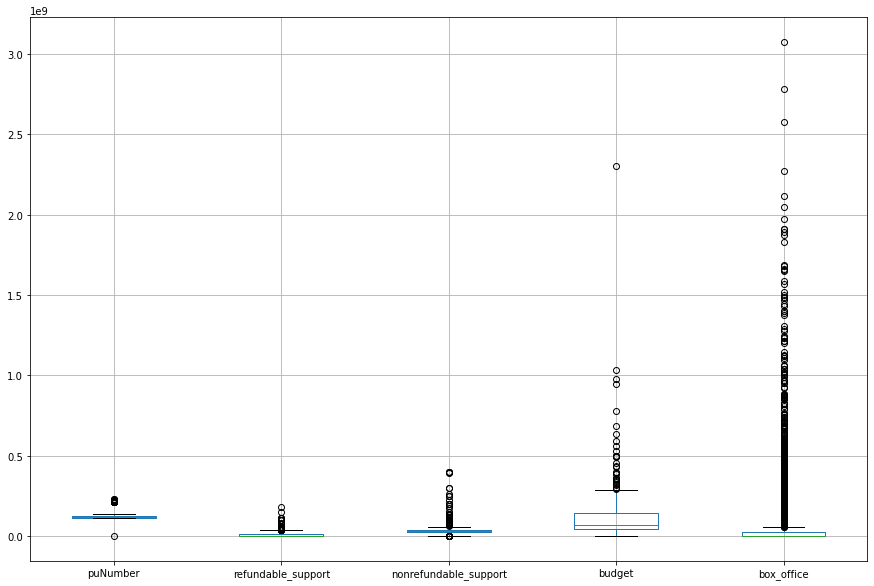

In [18]:
df.boxplot(figsize=(15, 10))

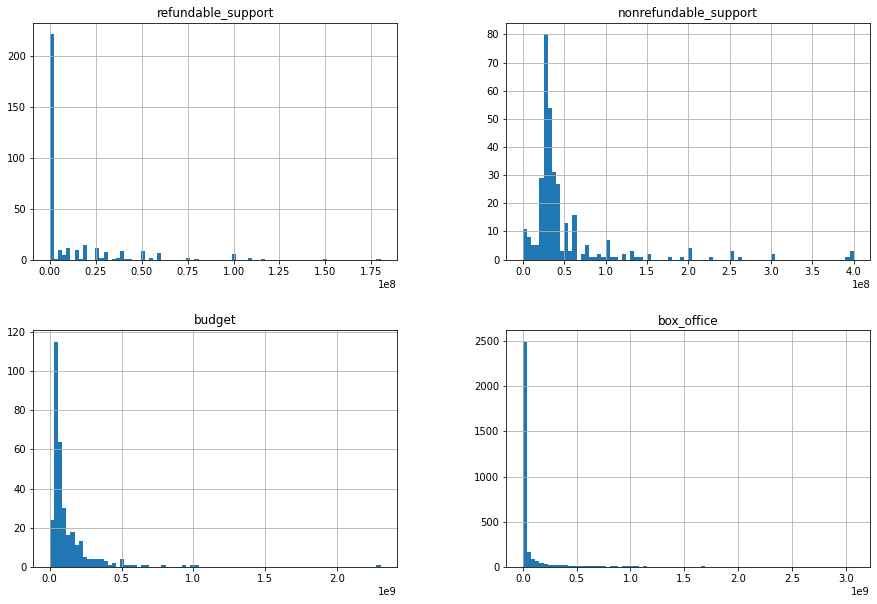

In [19]:
df.hist(['refundable_support', 'nonrefundable_support', 'budget', 'box_office'], figsize=(15, 10), bins=80); 

#### Вывод об общей информации о данных

Всего строк - 7485
Явных дубликатов нет

Выбросы есть во всех количественных переменных

Необходимо поменять тип данных в столбце show_start_date, ratings

### Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [20]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], yearfirst=True)

Изменим тип данных в ratings, предварительно обработав значения, представленные в виде процентов с помощью функции. Для этого заполним пропуски строчным значением '0', а затем вернём пропуски обратно

In [21]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [22]:
df['ratings'] = df['ratings'].fillna('0')

In [23]:
def per_cent_to_number(info): 
    if '%' in info:
        return int(info[:2]) / 10
    elif info == '0':
        return np.nan
    else:
        return info

In [24]:
df['ratings'] = df['ratings'].apply(per_cent_to_number)

In [25]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', 9.9, '4.4', '4.5', '5.3', '4.1', '8.4', '2.6', '3.8',
       '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7', '4.9',
       '3.9', '2.7', '3.3', '2.9', 2.8, '3.7', '1.4', '3.1', 9.7, '3.5',
       '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1', '3.6', 8.3,
       6.4, 9.1, 9.4, 6.2, 7.9, 9.0, 1.9, 8.8, '1.0', 8.9, '1.3', '1.9',
       '1.8', '1.2', '1.7', '9.0', 9.8, '8.9', '9.1'], dtype=object)

In [26]:
df['ratings'] = df['ratings'].astype(float)

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [27]:
df.isna().mean()

title                   0.000
puNumber                0.000
show_start_date         0.000
type                    0.000
film_studio             0.002
production_country      0.000
director                0.001
producer                0.076
age_restriction         0.000
refundable_support      0.956
nonrefundable_support   0.956
budget                  0.956
financing_source        0.956
ratings                 0.129
genres                  0.130
box_office              0.578
dtype: float64

Пропуски в количественных переменных, которые в данном случае являются пропусками в значениях, характеризующих финансы в киноиндустрии заполнять характерными значениями будет неправильно, поскольку

- во-первых, доля пропусков невероятно велика (от 57% до 95%). Вычислять характерное значение для такой выборки нельзя. Кроме того, будет неправильно заполнить такую львиную долю пропусков, это неминуемо приведёт к искажению результатов исследования


- во-вторых, деньги очень изменчивая переменная. Их величина зависит от многих переменных факторов с течением времени. Кроме того, деньги в такой крайне дифференцированной области жизни дифференцированы не меньше. 

Пропуски в качественных переменных заполнять слишком трудоёмко

In [28]:
df['director'] = df['director'].fillna('unknown')

In [29]:
df['genres'] = df['genres'].fillna('unknown')

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [30]:
df.duplicated().sum()

0

Явных дубликатов нет

Дубликаты логично искать здесь только в двух столбцах: puNumber и title

1) Рассмотрим puNumber на наличие дубликатов

In [31]:
df[df['puNumber'].duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.600,"драма,мелодрама,история",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.800,"комедия,криминал",NaN


In [32]:
df[df.puNumber == 221154310]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.000,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.600,"драма,мелодрама,история",NaN


В этом случае дубликаты появились, скорее всего, по ошибке человека, заносившего в базу данных прокатный номер. Поскольку дата релиза фильмов совпадает, то отличие в прокатном номере, возможно, состоит в одной цифре

In [33]:
df[df.puNumber == 221054410]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.400,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.800,"комедия,криминал",NaN


В этом случае причина появления дубликата прокатного номера кроется в разных названиях при локализации фильма в России.

2) Рассмотрим строки на наличие дубликатов в паре puNumber и title.

In [34]:
df[['puNumber', 'title']].duplicated().sum()

0

In [35]:
df['title'].str.strip().str.lower().duplicated().sum()

724

Встречается 724 одинаковых названия фильмов 

Попробуем лишь оценить сумму кассовых сборов. Такая оценка подвержена выбросам и не характеризует все фильмы с названиями-дубликатами, но можно оценить, отличается ли сумма сборов для "первых строк" среди строк с названиями-дубликатами от сборов "последних строк" соответственно.

In [36]:
df[df['title'].duplicated(keep='first')]['box_office'].sum() / df[df['title'].duplicated(keep='last')]['box_office'].sum()

2.3062716097826637

Сумма различна. Трудно понять, какие по номеру строки из строк-дубликатов оставить в финальном датафрейме. 

Кроме того мной найдена информация, что "На один фильм может быть выдано несколько прокатных удостоверений лицензиатам на соответствующие способы использования фильма". То есть решение оставить дубликаты в датафрейме будет вполне обоснованным.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [37]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.200,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.600,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер",NaN


На всякий случай избавимся от лишних пробелов по бокам строк в категориальных переменных

In [38]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip()

Проблемы для столбцов с категориальными переменными:

- Названия студий написаны на русском языке, возможно, где-то написание английских слов по-русски будет кардинально различаться, кроме того, для разных фильмов замечен разный порядок в написании названий этих студий. Это делает группировку по киностудиам практически невозможным


- Похожая проблема найдена в столбцах с именами режиссёров, продюссеров. Они тоже написаны на русском языке, в некоторых случаях используются инициалы, в некоторых - нет. Между инициалом и фамилией иногда нет пробела, иногда он присутствует, поэтому группировка или фильтрация по конкретному имени в данных условиях практически невозможна

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [39]:
df.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7485.000,332.000,332.000,332.000,6519.000,3158.000
mean,135196587.560,11864457.831,48980988.892,127229716.684,6.488,76478696.161
std,38352919.341,24916555.264,59980117.923,188588333.115,1.115,240353122.823
min,1811096.000,0.000,0.000,0.000,1.000,0.000
25%,112025118.000,0.000,25000000.000,42000000.000,5.900,86239.000
50%,121015510.000,0.000,30000000.000,68649916.000,6.600,2327987.550
75%,124003314.000,15000000.000,40375000.000,141985319.500,7.200,23979671.025
max,231001111.000,180000000.000,400000000.000,2305074303.000,9.900,3073568690.790


Подозрительно значение '0' найдено в столбцах budget и box_office. Просмотрим количество таких строк.

In [40]:
len(df[df['budget'] == 0])

17

In [41]:
len(df[df['box_office'] == 0])

24

К сожалению, единственным вариантом вижу заполнить нулевые значения пропусками (NaN). Поскольку определить бюджет и сборы в рублях и заполнить их будет проблематично.

In [42]:
df.loc[df['budget'] == 0, 'budget'] = np.nan

In [43]:
df.loc[df['box_office'] == 0, 'box_office'] = np.nan

(0.0, 500000000.0)

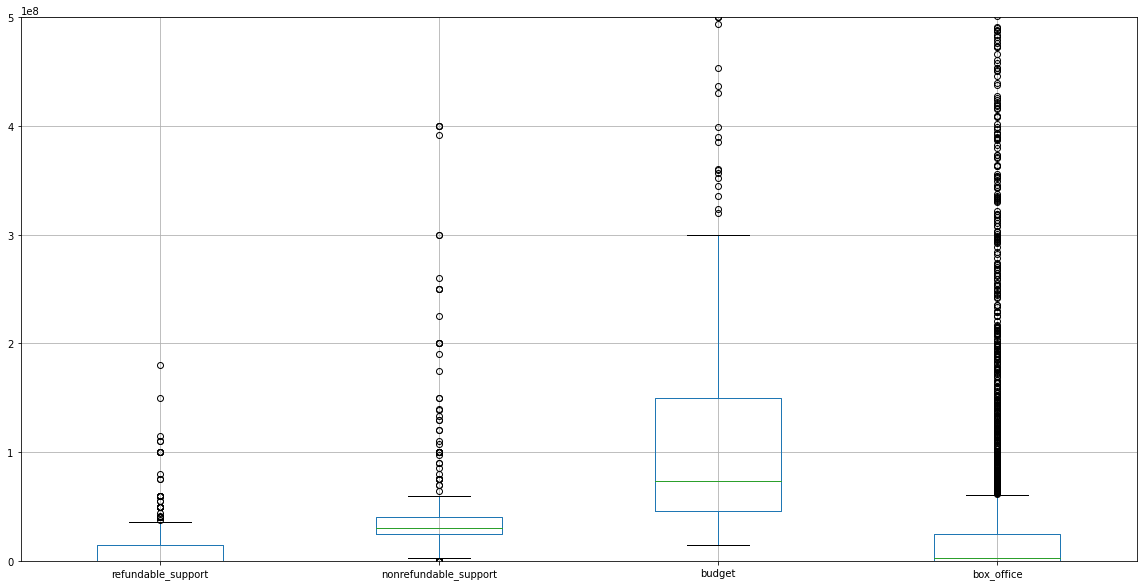

In [44]:
df.boxplot(['refundable_support',
            'nonrefundable_support',
            'budget',
            'box_office'], figsize=(20, 10))
plt.ylim(0, 0.5 * 10**9)

Cтолбец budget уже включает в себя полный объём государственной поддержки. 

Это можно проверить при вызове метода describe(). Ранее мы заметили, что количество непропущенных значений равно 332 во всех трех столбцах: 'refundable_support', 'nonrefundable_support', 'budget'. Это доказыает то, что budget указан только для фильмов с государственной поддержкой. 

Исходя из предмета исследования - рынка российского кинопроката, а также цели - выявить тренды и присмотреться к фильмам с гос. поддержкой, принято решение не удалять выбивающиеся значения, поскольку это усреднит картину и мы не увидим заметных трендов при детальном исследовательском анализе. К тому же, удалив все значения за границей ящика с усами мы потеряем большое число значений. Несмотря на то, что медиана у столбца 'box_office' стремиится к нулю, мы видим длинный хвост плотно сконцентрировавшихся значений. 

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [45]:
df['year_show'] = df['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [46]:
def main_director_genre(info):
    i = info.find(',')
    if i < 0:
        return info
    return info[:i]

In [47]:
df['main_director'] = df['director'].apply(main_director_genre)

In [48]:
df['main_genre'] = df['genres'].apply(main_director_genre)

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [49]:
df['govern_share'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget']

Проверим, правильно ли обработаны столбцы. Для этого вывыедем первые строки датафрейма

In [50]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_show,main_director,main_genre,govern_share
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.200,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.600,"драма,военный",NaN,2016,Е.Матвеев,драма,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика,NaN


#### Вывод по предобработке данных 

1. Изменены типы данных в столбцах: show_start_date (на datetime), ratings (на float)


2. Пропуски в качественных переменных заполнять слишком трудоёмко. Пропуски в количественных переменных, которые в данном случае являются пропусками в значениях, характеризующих финансы в киноиндустрии заполнять характерными значениями будет неправильно, поскольку:
    - во-первых, доля пропусков невероятно велика (от 57% до 95%). Вычислять характерное значение для такой выборки нельзя. Кроме того, будет неправильно заполнить такую львиную долю пропусков, это неминуемо приведёт к искажению результатов исследования
    - во-вторых, деньги очень изменчивая переменная. Их величина зависит от многих переменных факторов с течением времени. Кроме того, деньги в такой крайне дифференцированной области жизни дифференцированы не меньше.


3. Проблемы для столбцов с категориальными переменными:

    - Названия студий написаны на русском языке, возможно, где-то написание английских слов по-русски будет кардинально различаться, кроме того, для разных фильмов замечен разный порядок в написании названий этих студий. Это делает группировку по киностудиам практически невозможным

    - Похожая проблема найдена в столбцах с именами режиссёров, продюссеров. Они тоже написаны на русском языке, в некоторых случаях используются инициалы, в некоторых - нет. Между инициалом и фамилией иногда нет пробела, иногда он присутствует, поэтому группировка или фильтрация по конкретному имени в данных условиях практически невозможна



4. Встречается 724 одинаковых названия фильмов, однако все они имеют различные прокатные номера. Принято решение не удалять дубликаты. Найдена информация, что "На один фильм может быть выдано несколько прокатных удостоверений лицензиатам на соответствующие способы использования фильма". То есть решение оставить дубликаты в датафрейме будет вполне обоснованным. Найдено 2 дубликата в столбце puNumber. Приведено объяснение - ошибка при вводе данных человеком. Принято решение не удалять их, поскольку puNumber как таковой не пригодится в дальнейшем исследовании


5. Во всех категориальных стобцах удалены лишние пробелы по обеим сторонам строк.


6. Найдены подозрительные значение '0' в столбцах budget и box_office. Значение '0' заменено на NaN

### Исследовательский анализ данных

- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

#### Количетсво фильмов в прокате по годам

In [51]:
df.groupby('year_show')['puNumber'].agg(['count'])

,count
year_show,
2010,985
2011,622
2012,593
2013,630
2014,806
2015,705
2016,818
2017,505
2018,891


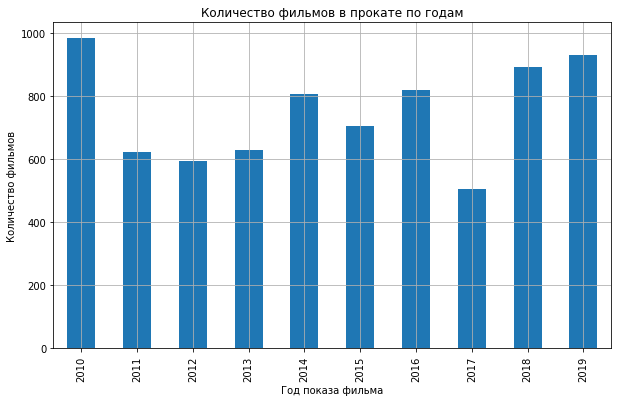

In [52]:
df.groupby('year_show')['puNumber'].agg('count').plot(kind='bar', grid=True);
plt.title('Количество фильмов в прокате по годам')
plt.ylabel('Количество фильмов')
plt.xlabel('Год показа фильма');

- Наибольшее количество фильмов зафискировано в 2010 году - примерно 1000 
- Наименьшее количество фильмов зафискировано в 2017 году - примерно 500 

#### Доля фильмов с указанной информацией о прокате в кинотеатрах

In [53]:
1 - df['box_office'].isna().mean()

0.41870407481629923

0,42 - общая по датафрейму доля фильмов с указанной информацией о прокате в кинотеатрах (кассовые сборы)

In [54]:
print('year', 'share', 'count')
for year in range(df['year_show'].min(), df['year_show'].max() + 1):
    sample = df[df['year_show'] == year]
    print(year, round(1 - sample['box_office'].isna().mean(), 2), sample['box_office'].count())

year share count
2010 0.1 101
2011 0.18 109
2012 0.21 123
2013 0.28 179
2014 0.34 273
2015 0.66 462
2016 0.64 525
2017 0.71 357
2018 0.53 475
2019 0.57 530


Либо можно решить методом из pandas:

In [87]:
df['has_box_office'] = ~df['box_office'].isna()
df.groupby('year_show')['has_box_office'].agg(['count', 'mean'])

,count,mean
year_show,,
2010,985,0.103
2011,622,0.175
2012,593,0.207
2013,630,0.284
2014,806,0.339
2015,705,0.655
2016,818,0.642
2017,505,0.707
2018,891,0.533


#### Динамика проката по годам

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [55]:
df.groupby('year_show')['box_office'].agg(['max', 'count'])

,max,count
year_show,,
2010,1446400.000,101
2011,11618085.000,109
2012,2311220.000,123
2013,19957031.500,179
2014,1016410635.300,273
2015,1658861425.500,462
2016,2048126108.000,525
2017,2779686144.000,357
2018,2271754004.520,475


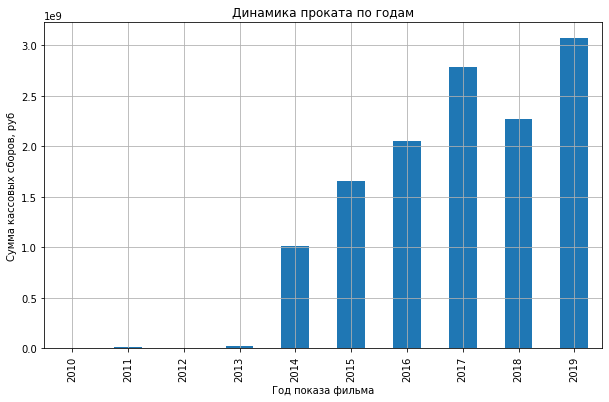

In [56]:
df.groupby('year_show')['box_office'].max().plot(kind='bar', grid=True)
plt.title('Динамика проката по годам')
plt.ylabel('Сумма кассовых сборов, руб')
plt.xlabel('Год показа фильма');

Сумма сборов была минимальной в 2014 году. Максимальной - в 2019. В промежутке с 2010 по 2013 скрывается какая-то ошибка, возможно сумма сборов в этот период указывалась в долларах. 

#### Cредняя и медианная сумма сборов для каждого года

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [57]:
df.groupby('year_show')['box_office'].agg(['mean', 'median', 'count'])

,mean,median,count
year_show,,,
2010,24046.079,1710.000,101
2011,129383.165,3000.000,109
2012,56548.154,6220.000,123
2013,166478.806,3580.000,179
2014,27270885.931,20400.000,273
2015,85492132.460,5003450.150,462
2016,91173904.270,3915041.020,525
2017,136032793.326,9968340.000,357
2018,104565059.230,8891102.210,475


In [58]:
df.groupby('year_show')['box_office'].agg(['mean', 'median', 'count'])['median'].mean()

3244064.1725000003

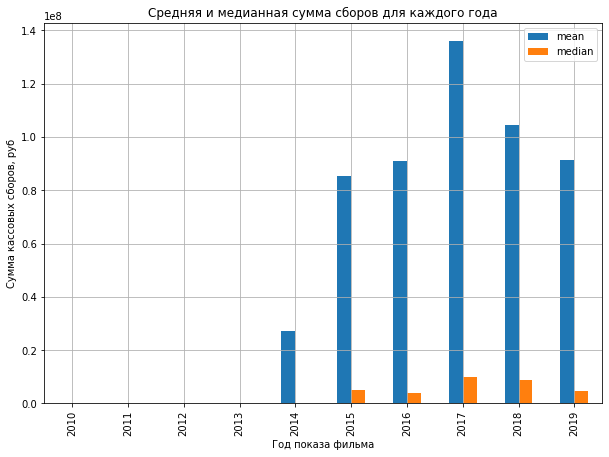

In [59]:
df.groupby('year_show')['box_office'].agg(['mean', 'median']).plot(kind='bar', figsize=(10, 7), grid=True)
plt.title('Средняя и медианная сумма сборов для каждого года')
plt.ylabel('Сумма кассовых сборов, руб')
plt.xlabel('Год показа фильма');

Cредняя сумма сборов достигает максимума в 2017 году - 140 миллионов. В 2015, 2016, 2018, 2019 годах - среднее для кассовых сборов равно примерно 90 миллионам. Медиана равна на протяжении всех лет не меняется критически и равна примерно 3.2 миллионам.

Такая картина в данных является следствием наличия очень успешных фильмов в российском кинопрокате, а поскольку, среднее является нестабильной выборочной оценкой, то мы можем наблюдать огромные средние значения кассовых сборов.

#### Влияние возрастного ограничения на сборы фильма в период с 2015 по 2019 год

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [60]:
df.query('year_show >= 2015').groupby(
    'age_restriction')['box_office'].agg(
    ['mean', 'count']).sort_values(by='mean', ascending=False)

,mean,count
age_restriction,,
«6+» - для детей старше 6 лет,176020854.258,317
«12+» - для детей старше 12 лет,174695811.609,347
«16+» - для детей старше 16 лет,94688335.795,803
«18+» - запрещено для детей,51464161.076,792
«0+» - для любой зрительской аудитории,8989749.177,90


«6+» - для детей старше 6 лет - категория, собирающая максимальные кассовые сборы

In [61]:
df.query('year_show >= 2015').pivot_table(index='year_show',
                                          values='box_office',
                                          columns='age_restriction',
                                          aggfunc=['mean', 'count'])

mean  \
age_restriction «0+» - для любой зрительской аудитории   
year_show                                                
2015                                       9975120.483   
2016                                       3664118.260   
2017                                      76532976.667   
2018                                       6489800.422   
2019                                       5915355.607   

                                                 \
age_restriction «12+» - для детей старше 12 лет   
year_show                                         
2015                              189112250.124   
2016                              148834713.712   
2017                              191498235.626   
2018                              212944651.652   
2019                              149178809.102   

                                                                             \
age_restriction «16+» - для детей старше 16 лет «18+» - запрещено для детей   
year_show                                                                     
2015                               68072580.061                41153851.268   
2016                               92069328.960                44992912.708   
2017                              154917709.918                65656432.524   
2018                              105792322.737                48939025.146   
2019                               71648421.262                55310362.315   

                                               \
age_restriction «6+» - для детей старше 6 лет   
year_show                                       
2015                            164184893.800   
2016                            172187800.118   
2017                            268580936.572   
2018                            148602567.991   
2019                            158673440.134   

                                                 count  \
age_restriction «0+» - для любой зрительской аудитории   
year_show                                                
2015                                                38   
2016                                                41   
2017                                                 3   
2018                                                 5   
2019                                                 3   

                                                 \
age_restriction «12+» - для детей старше 12 лет   
year_show                                         
2015                                         72   
2016                                         82   
2017                                         41   
2018                                         67   
2019                                         85   

                                                                             \
age_restriction «16+» - для детей старше 16 лет «18+» - запрещено для детей   
year_show                                                                     
2015                                        167                         132   
2016                                        181                         151   
2017                                        121                         147   
2018                                        156                         179   
2019                                        178                         183   

                                               
age_restriction «6+» - для детей старше 6 лет  
year_show                                      
2015                                       53  
2016                                       70  
2017                                       45  
2018                                       68  
2019                                       81

В ячейках ниже представлен код для организации порядка в категориях возрастных ограничений (будет нужно при выводе графиков)

In [88]:
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [89]:
cats = ['«0+» - для любой зрительской аудитории',
'«6+» - для детей старше 6 лет', 
'«12+» - для детей старше 12 лет', 
'«16+» - для детей старше 16 лет',
'«18+» - запрещено для детей']

In [93]:
cats_dict = {name: f'{i+1}. {name}' for i, name in enumerate(cats)}

In [95]:
df['age_restriction'] = df['age_restriction'].map(cats_dict)

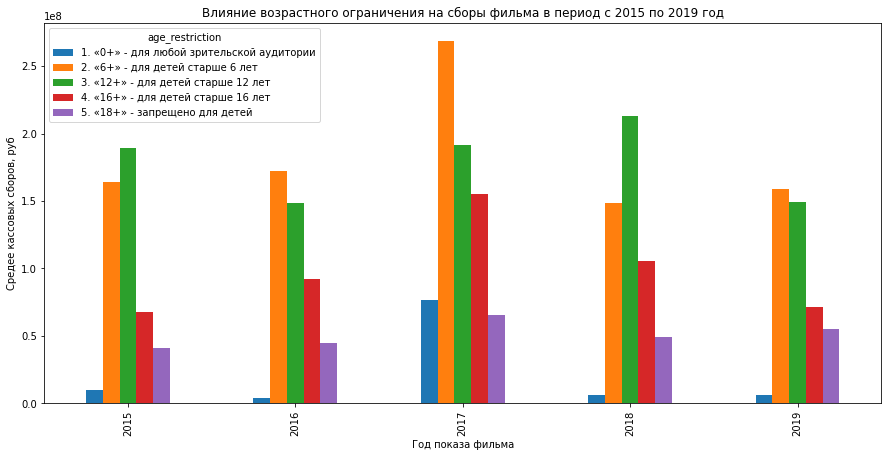

In [96]:
df.query('year_show >= 2015').pivot_table(index='year_show',
                                          values='box_office',
                                          columns='age_restriction').plot(kind='bar', figsize=(15, 7))
plt.title('Влияние возрастного ограничения на сборы фильма в период с 2015 по 2019 год')
plt.ylabel('Средее кассовых сборов, руб')
plt.xlabel('Год показа фильма');

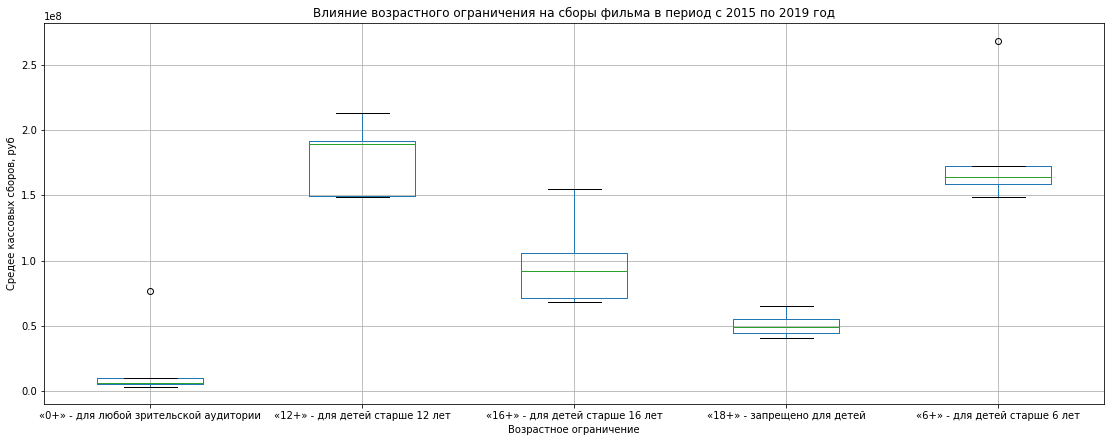

In [63]:
df.query('year_show >= 2015').pivot_table(index='year_show',
                                          values='box_office',
                                          columns='age_restriction').boxplot(figsize=(19, 7)); 
plt.title('Влияние возрастного ограничения на сборы фильма в период с 2015 по 2019 год')
plt.ylabel('Средее кассовых сборов, руб')
plt.xlabel('Возрастное ограничение');

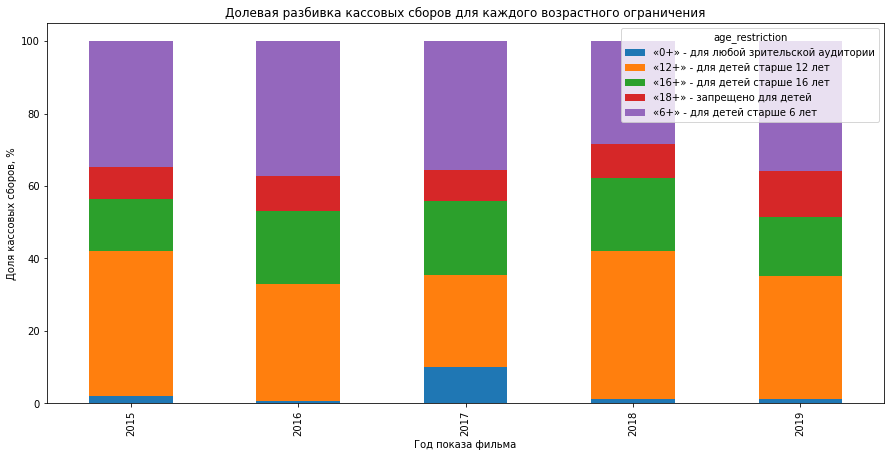

In [64]:
stacked_data = df.query('year_show >= 2015').pivot_table(index='year_show',
                                          values='box_office',
                                          columns='age_restriction').apply(lambda x: x*100/sum(x), axis=1)

stacked_data.plot(kind='bar',figsize=(15, 7), stacked=True);
plt.ylabel('Доля кассовых сборов, %')
plt.xlabel('Год показа фильма')
plt.title('Долевая разбивка кассовых сборов для каждого возрастного ограничения');

На графике выше можно наглядно увидеть доминирование ограничений 6+ и 12+ в кадом году. 

Возрастное ограничение влияет на сумму кассовых сборов. Однако в разрезе по годам ничего не меняется


- 0+ в общем случае собирают меньше всего. В 2017 году заметен пик, но обусловлен он маленькой выборкой (вышло всего 3 фильма)
- 18+ собирают значительно больше, но всё равно меньше, чем остальные типы ограничений - в среднем 50 миллионов. Скорее всего, это обусловлено жанром таких фильмов, в основном, это ужасы, которые многим не по душе. 
- 16+ собирают больше предыдущих - в среднем 90 миллионов
- Рекордсмены по сборам - 6+ и 12+, они в среднем собирают 170 млн руб, в разные года эти две группы обгоняют друг друга по сборам

#### Вывод по ИАД

1. Наибольшее количество фильмов зафискировано в 2010 году - примерно 1000. Наименьшее - в 2017 году - примерно 500


2. Не для всех фильмов указана информация о кассовых сборах, однако в разрезе по годам заметно, что с каждым годом доля фильмов с информацией о кассовых сборах увеличивается, а полнее всего представлен 2017 год (0.71 - максимум)


3. Сумма сборов была минимальной в 2014 году. Максимальной - в 2019. В промежутке с 2010 по 2013 скрывается какая-то ошибка, возможно сумма сборов в этот период указывалась в долларах.


4. В разрезе по годам медиана кассовых сборов колеблется в интервале от 3 до 10 млн. руб, а вот средняя сумма сборов достигает максимума в 2017 году - 140 миллионов. В 2015, 2016, 2018, 2019 годах - среднее для кассовых сборов равно примерно 90 миллионам.


5. Возрастное ограничение влияет на сумму кассовых сборов
    - 0+ в общем случае собирают меньше всего.
    - 18+ собирают значительно больше, но всё равно меньше, чем остальные типы возрастных ограничений - в среднем 50 миллионов. Скорее всего, это обусловлено жанром таких фильмов, в основном, это ужасы, которые многим не по душе. 
    - 16+ собирают больше предыдущих - в среднем 90 миллионов
    - Рекордсмены по сборам - 6+ и 12+, они в среднем собирают 170 млн руб, в разные года эти две группы обгоняют друг друга по сборам

### Исследование фильмов, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю. 

#### Зависимость кассовых сборов от доли государства в бюджете фильма

In [65]:
df.groupby(pd.cut(df['govern_share'],
                  bins=4))['box_office'].agg(['mean', 'median', 'count'])

,mean,median,count
govern_share,,,
"(0.0433, 0.229]",168652854.335,71136032.665,20
"(0.229, 0.414]",210308249.483,30156174.040,65
"(0.414, 0.6]",152458966.889,21058479.670,70
"(0.6, 0.785]",79622976.605,2788259.755,146


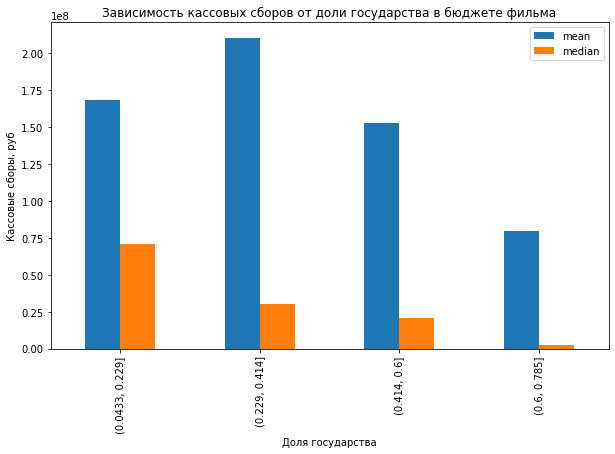

In [66]:
df.groupby(pd.cut(df['govern_share'],
                   bins=4))['box_office'].agg(['mean', 'median']).plot(kind='bar');
plt.ylabel('Кассовые сборы, руб')
plt.xlabel('Доля государства')
plt.title('Зависимость кассовых сборов от доли государства в бюджете фильма');

И среднее, и медиана демонстрируют тренд к снижению кассовых сборов с увеличением доли госудраства в бюджете фильма

Ниже рассмотрим зависимость между долей государства в бюджете и сборами в разбивке по годам. Для этого создадим столбец, который категоризирует информацию о доле государства для каждого фильма

In [67]:
df['govern_share_cut'] = pd.cut(df['govern_share'], bins=4)

In [68]:
df[df['govern_share'] > 0].pivot_table(index='year_show',
                                       values='box_office',
                                       columns='govern_share_cut',
                                       aggfunc=['mean', 'count'])

mean                                             \
govern_share_cut (0.0433, 0.229] (0.229, 0.414]  (0.414, 0.6]  (0.6, 0.785]   
year_show                                                                     
2013                         NaN     365353.600           NaN  19957031.500   
2014                32244810.000  168953431.440   3127494.750  17703027.686   
2015               213164369.429   17985504.841  88353930.249  33526928.981   
2016                30692865.000   76289905.724  68674384.964  99353568.966   
2017               225363457.387  483629481.505 211778847.833 262360209.929   
2018               164793036.230  291913747.283 231722781.553 101707804.147   
2019               142108786.662  278512016.623 187355180.580  24576827.496   

                           count                                           
govern_share_cut (0.0433, 0.229] (0.229, 0.414] (0.414, 0.6] (0.6, 0.785]  
year_show                                                                  
2013                           0              1            0            1  
2014                           1              5            2            7  
2015                           8             13           17           41  
2016                           2             10           11           34  
2017                           3              8           12           14  
2018                           2             12           14           24  
2019                           4             16           14           25

По сводной таблице заметно, что государство не склонно иметь небольшие доли (до 0.23) в общем бюджете фильма. Наибольшее количетсво фильмов получает достаточно много средств от государства - (0.6, 0.785] в общем бюджете

Не рассматриваем 2013 и 2014 года в силу величины выборки - однако, можно заметить тенденцию на увеличение доли государства в бюджете фильма с течением времени: в 2013 фильмов с поддержкой государства было совсем мало, а в 2014 их стало на порядок больше. А 2015 и 2016 года оказались рекордными для количества фильмов с львиной долей государства в бюджете - (0.6, 0.785]

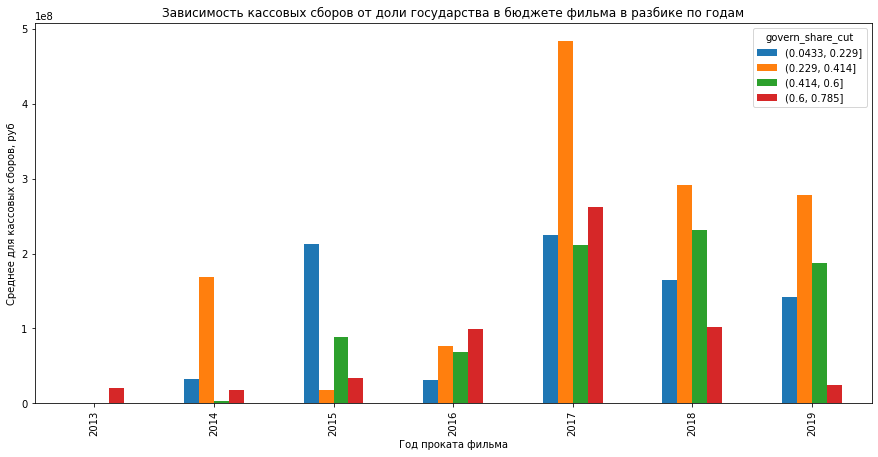

In [69]:
df[df['govern_share'] > 0].pivot_table(index='year_show',
                                       values='box_office',
                                       columns='govern_share_cut',
                                       aggfunc='mean').plot(kind='bar', figsize=(15, 7));
plt.ylabel('Среднее для кассовых сборов, руб')
plt.xlabel('Год проката фильма')
plt.title('Зависимость кассовых сборов от доли государства в бюджете фильма в разбике по годам');

Не берем в рассмотрение 2013 и 2014 года в силу величины выборки. 

- В большистве случаев фильмы с долей государства в бюджете фильма равной (0.229, 0.414] имеют в среднем самые большие сборы. 
- Фильмы с наибольшей долей государства (0.6, 0.785] далеко не всегда оказываются самыми успешными в прокате

#### Cамые популярные жанры фильмов для поддержки государством

In [70]:
gov_genres = df[df['govern_share'] > 0]['main_genre'].value_counts().to_frame()
gov_genres['share'] = round((gov_genres['main_genre'] / gov_genres['main_genre'].sum()), 2)
gov_genres

,main_genre,share
драма,92,0.290
комедия,68,0.220
мультфильм,26,0.080
unknown,15,0.050
мелодрама,14,0.040
триллер,14,0.040
фэнтези,11,0.030
ужасы,10,0.030
фантастика,10,0.030
военный,9,0.030


Государство предпочитает больше поддерживать драмы (29% от всего количетсва фильмов), чем комедии (22%), следом идут мультфильмы (8%)

#### Окупаемость фильмов с гос. поддержкой

Для удобства, создадим датафрейм home, куда войдут строки из исходного датафрейма с поддержкой государства.

In [71]:
home = df.loc[:]
home = home[home['govern_share'] > 0]

In [72]:
home.reset_index().head()

,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_show,main_director,main_genre,govern_share,govern_share_cut
0,1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.000,26500000.000,79411900.000,Министерство культуры,8.100,"драма,мелодрама",365353.600,2013,А.Атанесян,драма,0.334,"(0.229, 0.414]"
1,1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.000,26000000.000,37142857.000,Министерство культуры,NaN,unknown,28140.000,2014,А.Якимчук,unknown,0.700,"(0.6, 0.785]"
2,1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.000,107847945.000,176023490.000,Фонд кино,5.300,"комедия,фантастика",19957031.500,2013,Р.Давлетьяров,комедия,0.613,"(0.6, 0.785]"
3,1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.000,28000000.000,40574140.000,Министерство культуры,4.200,драма,55917.500,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.690,"(0.6, 0.785]"
4,1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.000,25000000.000,40015122.000,Министерство культуры,6.400,драма,232100.000,2014,М.Угаров,драма,0.625,"(0.6, 0.785]"


Создадим столбец 'dif' с разницей между кассовыми сборами и бюджетом фильма

In [73]:
home['dif'] = home['box_office'] - home['budget']

In [74]:
home['dif'].sum()

-1245992588.4500003

На 2019 год вся сумма кассовых сборов для фильмов с поддержкой государства отрицательна. Общий убыток составляет 1.3 миллиарда рублей.

In [75]:
len(home[home['dif'] < 0]) / len(home)

0.746031746031746

75% фильмов с поддержкой государства не окупаются в прокате

#### Зависимость рейтинга российских фильмов от доли государства в бюджете

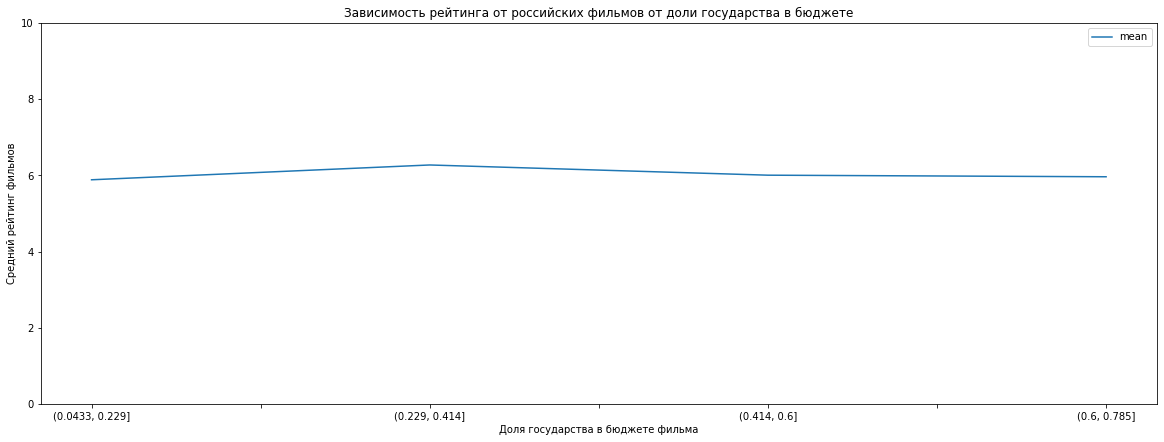

In [76]:
home.groupby('govern_share_cut')['ratings'].agg(['mean']).plot(figsize=(20,7))
plt.ylim(0,10)
plt.title('Зависимость рейтинга от российских фильмов от доли государства в бюджете')
plt.ylabel('Средний рейтинг фильмов')
plt.xlabel('Доля государства в бюджете фильма');

Рейтинг российского фильма не зависит от величины государственной поддержки

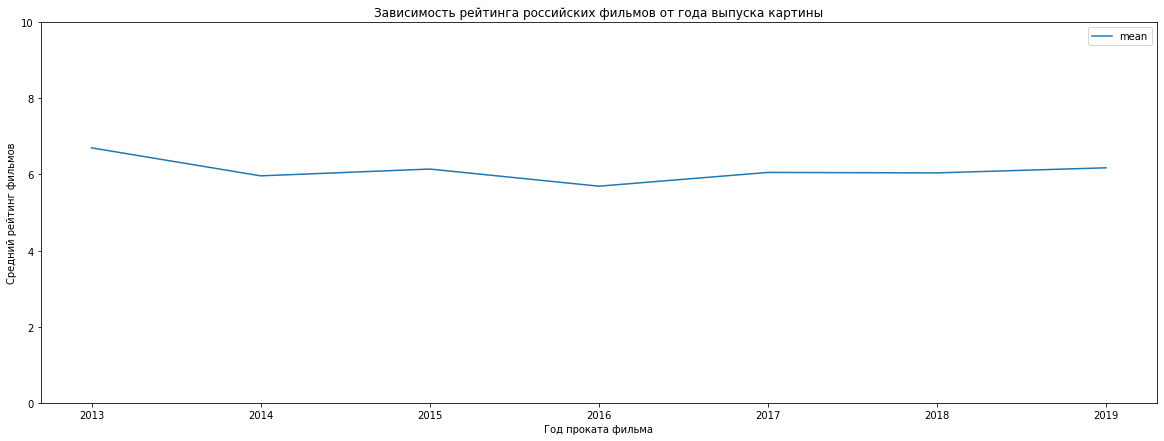

In [77]:
home.groupby('year_show')['ratings'].agg(['mean']).plot(figsize=(20,7))
plt.ylim(0,10)
plt.title('Зависимость рейтинга российских фильмов от года выпуска картины')
plt.ylabel('Средний рейтинг фильмов')
plt.xlabel('Год проката фильма');

Рейтинг российских фильмов не зависит от года выпуска фильма

#### Количество средств, выделенных государством на поддержку кино 

Рассмотрим среднее количетсво средств на возвратной и безвозвратной основе в разбивке по годам

In [78]:
home.groupby('year_show')[['refundable_support', 'nonrefundable_support']].agg(['mean', 'count'])

refundable_support       nonrefundable_support      
                        mean count                  mean count
year_show                                                     
2013                   0.000     2          67173972.500     2
2014             4733333.333    15          31866819.933    15
2015             6839413.987    80          33501104.250    80
2016            15560344.828    58          53011301.414    58
2017            17290945.667    39          62169866.179    39
2018            11384615.385    52          48192307.692    52
2019            12579710.145    69          55884057.971    69

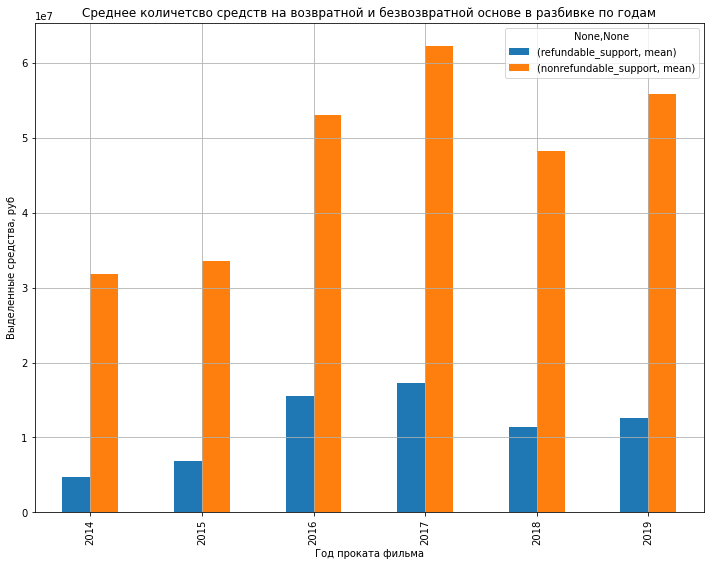

In [79]:
home.query('year_show > 2013').groupby('year_show')[
    ['refundable_support', 'nonrefundable_support']].agg(['mean']).plot(
    kind='bar',
    figsize=(12, 9),
    grid=True);
plt.title('Среднее количетсво средств на возвратной и безвозвратной основе в разбивке по годам')
plt.ylabel('Выделенные средства, руб')
plt.xlabel('Год проката фильма');

- Государство предпочитает использовать спонсирование фильмов на безвозвратной основе
- Среднее значение средств, выданных на безвозвратной основе увеличивалось с 2014 до 2017 год включительно. В 2018 году государство потратило в среднем на 10 млн рублей меньше на выдачу средств на безвозравтной основе, однако эта цифра возрасла в 2019 году
- Среднее значение средств, выданных на возвратной основе колеблется в промежутке от 5 до 15 млн для фильма в каждый год

Ниже рассмотрим общую сумму средств на возвратной и безвозвратной основе в разбивке по годам. 

In [80]:
home.query('year_show > 2013').groupby('year_show')[
    ['refundable_support', 'nonrefundable_support']].agg(['sum', 'count'])

refundable_support       nonrefundable_support      
                         sum count                   sum count
year_show                                                     
2014            71000000.000    15         478002299.000    15
2015           547153119.000    80        2680088340.000    80
2016           902500000.000    58        3074655482.000    58
2017           674346881.000    39        2424624781.000    39
2018           592000000.000    52        2506000000.000    52
2019           868000000.000    69        3856000000.000    69

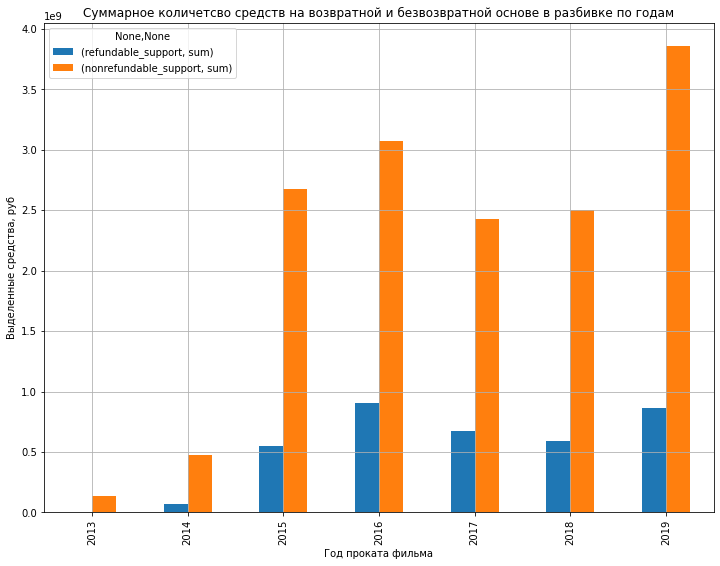

In [81]:
home.groupby('year_show')[
    ['refundable_support', 'nonrefundable_support']].agg(['sum']).plot(
    kind='bar',
    figsize=(12, 9),
    grid=True);
plt.title('Суммарное количетсво средств на возвратной и безвозвратной основе в разбивке по годам')
plt.ylabel('Выделенные средства, руб')
plt.xlabel('Год проката фильма');

- В 2015 году вместе с возросшим количеством фильмов с долей государства в бюджете резко возрасла и общая сумма поддержки - особенно, на независимой основе. 

- Сумма поддержки на безвозвратной основе с 2015 по 2018 год была примерно одинаковой - 2.5-3 млрд рублей в год

- В 2019 году было выдано 3.8 млрд рублей на безвозвратной основе

#### Зависимость окупаемости от доли государства в бюджете 

In [82]:
home.groupby('govern_share_cut')['dif'].agg(['mean', 'median', 'count'])

,mean,median,count
govern_share_cut,,,
"(0.0433, 0.229]",-206095771.865,-109512261.000,20
"(0.229, 0.414]",52362172.344,-69372928.000,65
"(0.414, 0.6]",29958039.631,-42888140.005,70
"(0.6, 0.785]",-17977267.998,-38674514.750,146


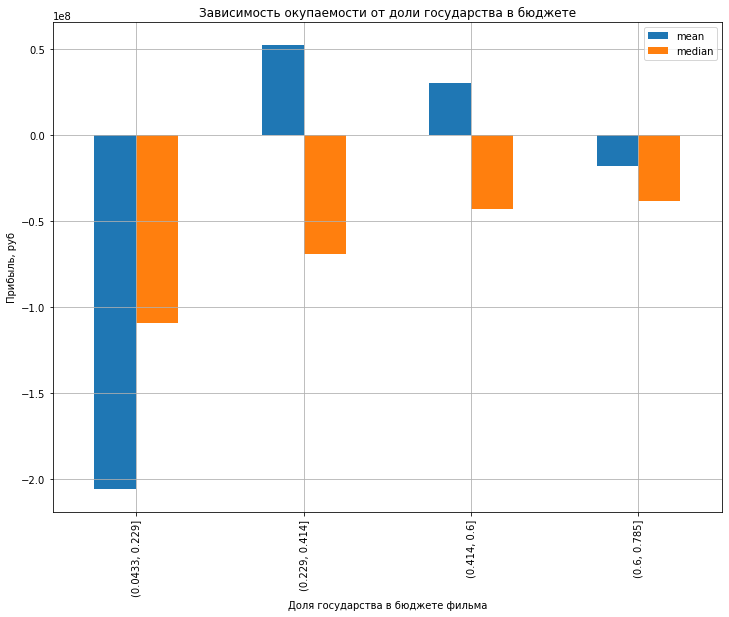

In [83]:
home.groupby('govern_share_cut')['dif'].agg(['mean', 'median']).plot(
    kind='bar',
    figsize=(12, 9),
    grid=True);
plt.title('Зависимость окупаемости от доли государства в бюджете')
plt.ylabel('Прибыль, руб')
plt.xlabel('Доля государства в бюджете фильма');

- В случае небольшой доли государства в бюджете (до 23%) фильм сильнее всего уходит в убыток
- Средние доли прибыли в диапазоне (0.229, 0.414] и (0.414, 0.6] являются положительными. Это указывает на то, что при такой доле гос. поддержке вышли крайне успешные с точки зрения проката фильмы, которые вытянули среднее значение прибыли в сторону положительных значений, тогда как медиана свидетельствует об убыточности подавляющего большинства фильмов
- Зависимость между окупаемостью фильма и долей государства в бюджете - положительная. По медиане заметно, что с увеличением доли государства в бюджете фильма, фильм окупается лучше. 

#### Вывод по исследованию фильмов с гос. поддержкой

1. Выявлена отрицательная зависимость между кассовых сборами и долей государства в бюджете фильма. 
    - И среднее, и медиана демонстрируют тренд к снижению кассовых сборов с увеличением доли госудраства в бюджете фильма. 
    - По сводной таблице с разбивкой по годам заметно, что государство не склонно иметь небольшие доли (до 0.23) в общем бюджете фильма. 
    - Наибольшее количетсво фильмов получает достаточно много средств от государства - (0.6, 0.785] в общем бюджете. 
    - Рассматривая 2013 и 2014 года можно заметить тенденцию на увеличение фильмов с долей государства в бюджете фильма с течением времени: в 2013 фильмов с поддержкой государства было совсем мало, а в 2014 их стало на порядок больше. 
    - 2015 и 2016 года оказались рекордными для количества фильмов с львиной долей государства в бюджете - (0.6, 0.785].
    
    
2. Государство предпочитает больше поддерживать драмы (29% от всего количетсва фильмов), чем комедии (22%), следом идут мультфильмы (8%)


3. Окупаемость фильмов с гос. поддержкой
    - На 2019 год общая сумма кассовых сборов для фильмов с поддержкой государства отрицательна. Общий убыток составляет 1.3 миллиарда рублей. 
    - 75% фильмов с поддержкой государства не окупаются в прокате
    
    
4.  Зависимость рейтинга от доли государства в бюджете и года выпуска фильма
    - Средний рейтинг отечественных фильмов не зависит от величины государственной поддержки
    - Средний рейтинг отечественных фильмов не зависит от года выпуска фильма
    
    
5. Количество средств, выделенных государством на поддержку кино
    - Государство предпочитает использовать спонсирование фильмов на безвозвратной основе
    - Среднее значение средств, выданных на безвозвратной основе увеличивалось с 2014 до 2017 год включительно. В 2018 году государство потратило в среднем на 10 млн рублей меньше на выдачу средств на безвозравтной основе, однако эта цифра возрасла в 2019 году
    - Среднее значение средств, выданных на возвратной основе колеблется в промежутке от 5 до 15 млн для фильма в каждый год
    
    
6. Количество средств, выделенных государством на поддержку кино в разбивке по годам
    - В 2015 году вместе с возросшим количеством фильмов с долей государства в бюджете резко возрасла и общая сумма поддержки - особенно, на независимой основе. 
    - Сумма поддержки на безвозвратной основе с 2015 по 2018 год была примерно одинаковой - 2.5-3 млрд рублей в год
    - В 2019 году было выдано 3.8 млрд рублей на безвозвратной основе
    
    
7. Зависимость окупаемости от доли государства в бюджете
    - В случае небольшой доли государства в бюджете (до 23%) фильм сильнее всего уходит в убыток
    - Средние доли прибыли в диапазоне (0.229, 0.414] и (0.414, 0.6] являются положительными. Это указывает на то, что при такой доле гос. поддержке вышли крайне успешные с точки зрения проката фильмы, которые вытянули среднее значение прибыли в сторону положительных значений, тогда как медиана свидетельствует об убыточности подавляющего большинства фильмов
    - Зависимость между окупаемостью фильма и долей государства в бюджете - положительная. По медиане заметно, что с увеличением доли государства в бюджете фильма, фильм окупается лучше. 
    
    
    


__Так "нравятся ли людям фильмы с поддержкой государства?"__

- кассовые сборы тем меньше, чем больше доля государства в бюджете фильма
- 75% фильмов не окупаются в прокате
- рейтинг фильма не зависит от доли государства в бюджете фильма 

__Можно сделать вывод, что люди скорее предпочитают смотреть фильмы с низкой долей государственных средств в бюджете__

### Общий вывод

__Вывод по предобработке данных__ 

1. Изменены типы данных в столбцах: show_start_date (на datetime), ratings (на float)


2. Пропуски в качественных переменных заполнять слишком трудоёмко. Пропуски в количественных переменных, которые в данном случае являются пропусками в значениях, характеризующих финансы в киноиндустрии заполнять характерными значениями будет неправильно, поскольку:
    - во-первых, доля пропусков невероятно велика (от 57% до 95%). Вычислять характерное значение для такой выборки нельзя. Кроме того, будет неправильно заполнить такую львиную долю пропусков, это неминуемо приведёт к искажению результатов исследования
    - во-вторых, деньги очень изменчивая переменная. Их величина зависит от многих переменных факторов с течением времени. Кроме того, деньги в такой крайне дифференцированной области жизни дифференцированы не меньше.


3. Встречается 724 одинаковых названия фильмов, однако все они имеют различные прокатные номера. Принято решение не удалять дубликаты. Найдена информация, что "На один фильм может быть выдано несколько прокатных удостоверений лицензиатам на соответствующие способы использования фильма". То есть решение оставить дубликаты в датафрейме будет вполне обоснованным. Найдено 2 дубликата в столбце puNumber. Приведено объяснение - ошибка при вводе данных человеком. Принято решение не удалять их, поскольку puNumber как таковой не пригодится в дальнейшем исследовании


4. Во всех категориальных стобцах удалены лишние пробелы по обеим сторонам строк.


5. Найдены подозрительные значение '0' в столбцах budget и box_office. Значение '0' заменено на NaN


__Вывод по исследовательскому анализу данных__

1. Наибольшее количество фильмов зафискировано в 2010 году - примерно 1000. Наименьшее - в 2017 году - примерно 500


2. Не для всех фильмов указана информация о кассовых сборах, однако в разрезе по годам заметно, что с каждым годом доля фильмов с информацией о кассовых сборах увеличивается, а полнее всего представлен 2017 год (0.71 - максимум)


3. Сумма сборов была минимальной в 2014 году. Максимальной - в 2019. В промежутке с 2010 по 2013 скрывается какая-то ошибка, возможно сумма сборов в этот период указывалась в долларах.


4. В разрезе по годам медиана кассовых сборов колеблется в интервале от 3 до 10 млн. руб, а вот средняя сумма сборов достигает максимума в 2017 году - 140 миллионов. В 2015, 2016, 2018, 2019 годах - среднее для кассовых сборов равно примерно 90 миллионам.


5. Возрастное ограничение влияет на сумму кассовых сборов
    - 0+ в общем случае собирают меньше всего.
    - 18+ собирают значительно больше, но всё равно меньше, чем остальные типы возрастных ограничений - в среднем 50 миллионов. Скорее всего, это обусловлено жанром таких фильмов, в основном, это ужасы, которые многим не по душе. 
    - 16+ собирают больше предыдущих - в среднем 90 миллионов
    - Рекордсмены по сборам - 6+ и 12+, они в среднем собирают 170 млн руб, в разные года эти две группы обгоняют друг друга по сборам
    
    
    
__Исследование фильмов, которые получили государственную поддержку__

1. Выявлена отрицательная зависимость между кассовых сборами и долей государства в бюджете фильма. 
    - И среднее, и медиана демонстрируют тренд к снижению кассовых сборов с увеличением доли госудраства в бюджете фильма. 
    - По сводной таблице с разбивкой по годам заметно, что государство не склонно иметь небольшие доли (до 0.23) в общем бюджете фильма. 
    - Наибольшее количетсво фильмов получает достаточно много средств от государства - (0.6, 0.785] в общем бюджете. 
    - Рассматривая 2013 и 2014 года можно заметить тенденцию на увеличение фильмов с долей государства в бюджете фильма с течением времени: в 2013 фильмов с поддержкой государства было совсем мало, а в 2014 их стало на порядок больше. 
    - 2015 и 2016 года оказались рекордными для количества фильмов с львиной долей государства в бюджете - (0.6, 0.785].
    
    
2. Государство предпочитает больше поддерживать драмы (29% от всего количетсва фильмов), чем комедии (22%), следом идут мультфильмы (8%)


3. Окупаемость фильмов с гос. поддержкой
    - На 2019 год общая сумма кассовых сборов для фильмов с поддержкой государства отрицательна. Общий убыток составляет 1.3 миллиарда рублей. 
    - 75% фильмов с поддержкой государства не окупаются в прокате
    
    
4.  Зависимость рейтинга от доли государства в бюджете и года выпуска фильма
    - Средний рейтинг отечественных фильмов не зависит от величины государственной поддержки
    - Средний рейтинг отечественных фильмов не зависит от года выпуска фильма
    
    
5. Количество средств, выделенных государством на поддержку кино
    - Государство предпочитает использовать спонсирование фильмов на безвозвратной основе
    - Среднее значение средств, выданных на безвозвратной основе увеличивалось с 2014 до 2017 год включительно. В 2018 году государство потратило в среднем на 10 млн рублей меньше на выдачу средств на безвозравтной основе, однако эта цифра возрасла в 2019 году
    - Среднее значение средств, выданных на возвратной основе колеблется в промежутке от 5 до 15 млн для фильма в каждый год
    
    
6. Количество средств, выделенных государством на поддержку кино в разбивке по годам
    - В 2015 году вместе с возросшим количеством фильмов с долей государства в бюджете резко возрасла и общая сумма поддержки - особенно, на независимой основе. 
    - Сумма поддержки на безвозвратной основе с 2015 по 2018 год была примерно одинаковой - 2.5-3 млрд рублей в год
    - В 2019 году было выдано 3.8 млрд рублей на безвозвратной основе
    
    
7. Зависимость окупаемости от доли государства в бюджете
    - В случае небольшой доли государства в бюджете (до 23%) фильм сильнее всего уходит в убыток
    - Средние доли прибыли в диапазоне (0.229, 0.414] и (0.414, 0.6] являются положительными. Это указывает на то, что при такой доле гос. поддержке вышли крайне успешные с точки зрения проката фильмы, которые вытянули среднее значение прибыли в сторону положительных значений, тогда как медиана свидетельствует об убыточности подавляющего большинства фильмов
    - Зависимость между окупаемостью фильма и долей государства в бюджете - положительная. По медиане заметно, что с увеличением доли государства в бюджете фильма, фильм окупается лучше. 
    
    
    


__Так "нравятся ли людям фильмы с поддержкой государства?"__

- кассовые сборы тем меньше, чем больше доля государства в бюджете фильма
- 75% фильмов не окупаются в прокате
- рейтинг фильма не зависит от доли государства в бюджете фильма 

__Можно сделать вывод, что люди скорее предпочитают смотреть фильмы с низкой долей государственных средств в бюджете. При этом выставленный после просмотра фильма не зависит от доли государственной поддержки фильма__